In [54]:
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [55]:
def convolution(x,h):
    lengthX = np.size(x)
    lengthH = np.size(h)
    y = np.zeros(lengthX+lengthH-1)
    for n in np.arange(lengthX + lengthH - 2):
        for k in np.arange(min(lengthX,n)):
            if (n-k) <= lengthH-1:
                y[n] = y[n] + x[k]*h[n-k]
    return y

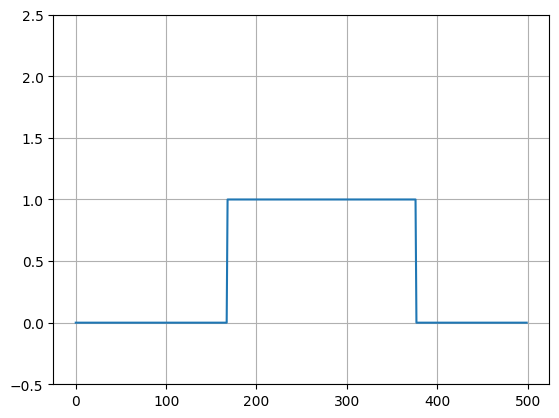

In [56]:
t = np.linspace(0.15, 0.35, 500, endpoint=False)

plt.ylim(-0.5, 2.5)
sig1 = signal.square(2 * np.pi * 5.99 * t+4.4)+1
sig1 = sig1/2
plt.plot(sig1)
plt.grid('on')

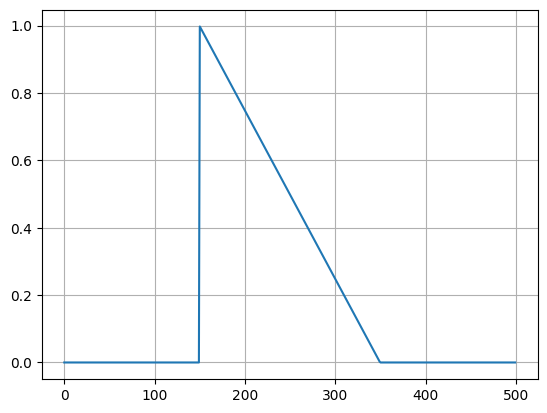

In [57]:
sigt = np.zeros_like(sig1)
sigt[150:350] = signal.triang(400)[200:]
plt.plot(sigt)
plt.grid('on')

In [58]:
len(sigt)

500

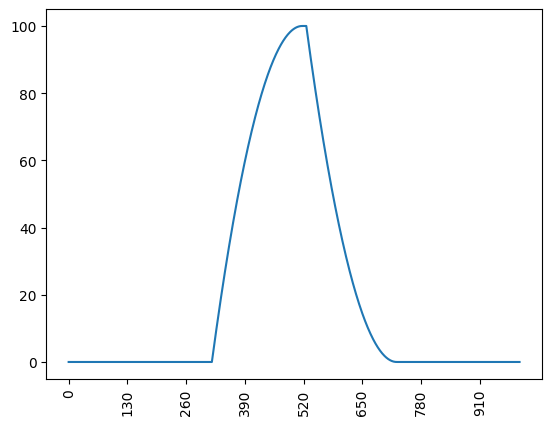

In [59]:
y_1 = convolution(sig1,sigt)
plt.plot(y_1)
_=plt.xticks(np.arange(0,1000,130),rotation=90)

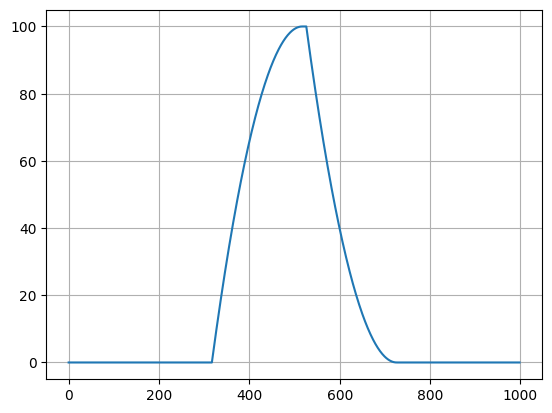

In [60]:
plt.plot(np.convolve(sig1,sigt,'full'))
plt.grid('on')

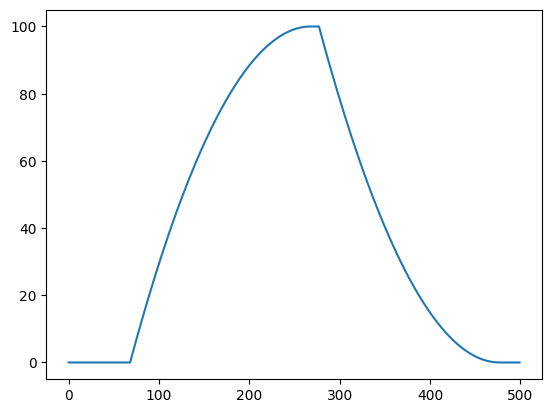

In [61]:
plt.plot(np.convolve(sig1,sigt,'same'))

In [62]:
np.convolve(sig1,sigt,'valid')

array([99.19])

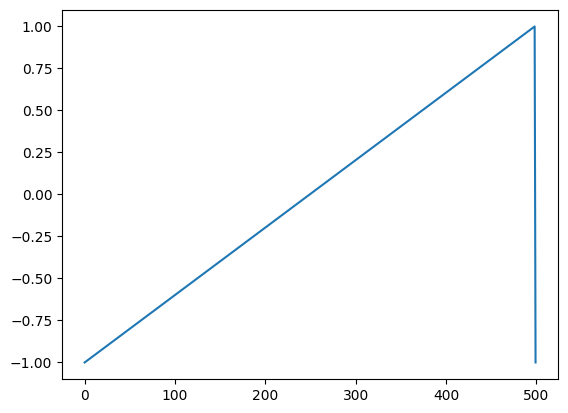

In [63]:
t = np.linspace(0, 0.2, 500)

sig2 = signal.sawtooth(2 * np.pi * 5 * t)
plt.plot(sig2)

In [64]:
out = convolution(sig1,sig2)

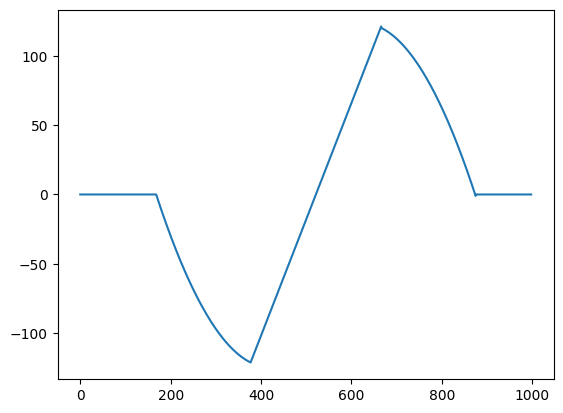

In [65]:
plt.plot(out)
plt.show()
#plt.plot(np.convolve(sig1,sig2,'full'))

In [66]:
out.shape

(999,)

In [67]:
sig2.shape

(500,)

In [68]:
sig1.shape

(500,)

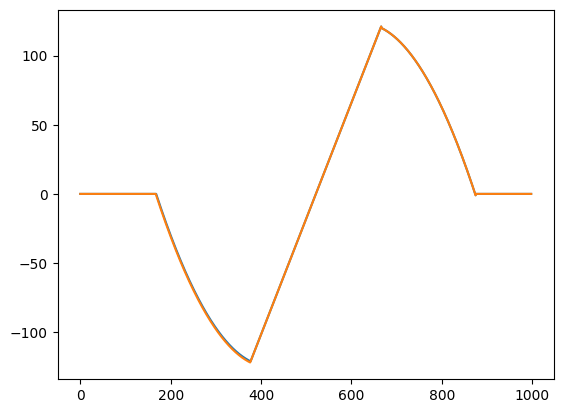

In [69]:
plt.plot(out)
plt.plot(np.convolve(sig1,sig2,'full'))
plt.show()

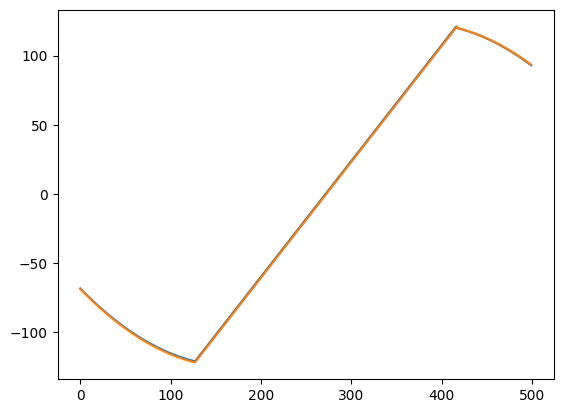

In [70]:
plt.plot(out[250:750])
plt.plot(np.convolve(sig1,sig2,'same'))

(-2.0, 2.0)

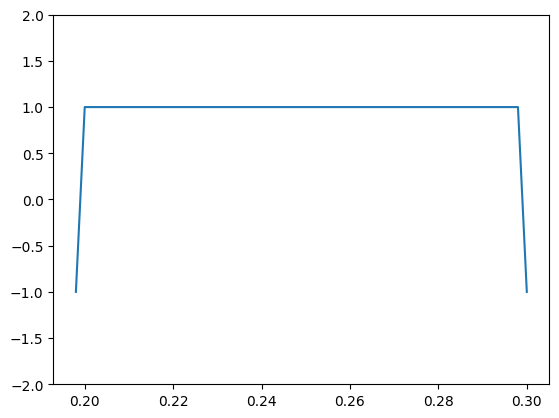

In [71]:
t = np.linspace(0.0, 1.0, 500, endpoint=False)
t1 = t[99:151]
temp = signal.square(2 * np.pi * 5 * t1)
plt.plot(t1,temp)
plt.ylim(-2, 2)

(-2.0, 2.0)

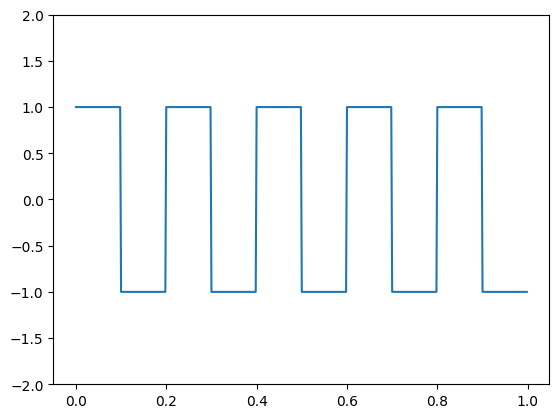

In [72]:
sig1 = signal.square(2 * np.pi * 5 * t)


plt.plot(t,sig1)
plt.ylim(-2, 2.0)

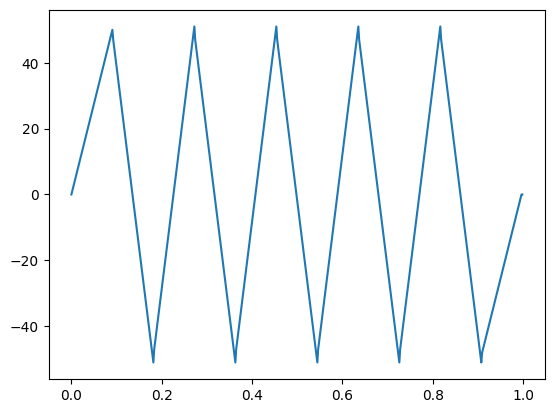

In [73]:
c = convolution(sig1,temp)

t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(t2,c)

In [74]:
sigN = sig1+np.random.normal(0,2,500)

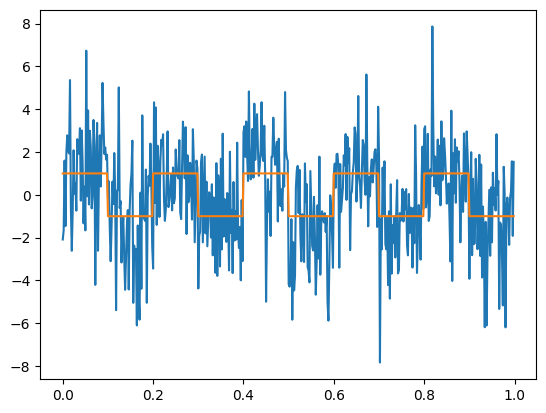

In [75]:
plt.plot(t,sigN)
plt.plot(t,sig1)

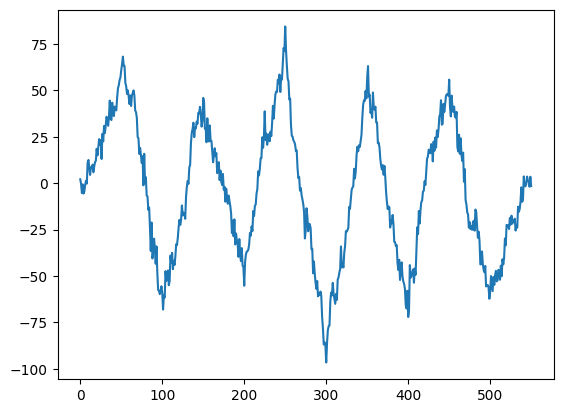

In [76]:
c = np.convolve(sigN,temp)
#t2 = np.linspace(0, 1.0, 551, endpoint=False)
plt.plot(c)

In [77]:
from scipy import signal
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

/var/folders/vg/c0z21yg92qd0jhn0p09c9x200000gp/T/ipykernel_51552/3409646347.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


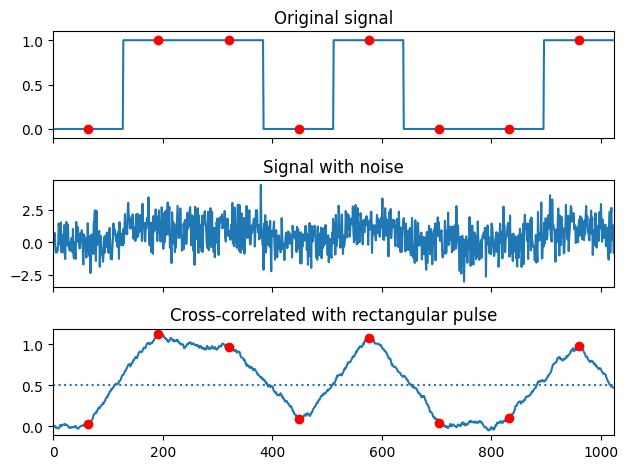

In [78]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()

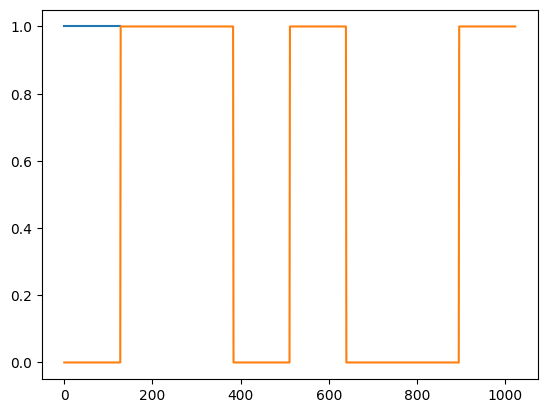

In [79]:
plt.plot(np.ones(128))
plt.plot(sig)